In [31]:
import numpy as np
from julia import Julia
jl = Julia(compiled_modules=False)

In [42]:
run_random_circuit = jl.include("./run_random_circuit.jl")
N = 3
D = 10
shots = 100
result = run_random_circuit(N, D, shots, True)


C:\Users\mathc\anaconda3\lib\site-packages\julia\core.py:687: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  warnings.warn(


In [43]:
print(result)

[[1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [0 0 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [0 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 0 1]
 [0 0 1]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 1]
 [0 0 1]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [0 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 [1 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 1]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [0 1 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [0 1 1]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 0]
 [1 1 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [0 0 1]
 [1 1 0]
 [0 0 0]
 [0 0 1]]


In [44]:
def bin_to_int(bin_l:list)->int:
    l = len(bin_l)
    ret = 0
    for i, v in enumerate(bin_l):
        ret += 2**(l - i - 1) if v else 0
    return ret
histogram_list = np.zeros(2**N)
for r in result:
    histogram_list[bin_to_int(r)] += 1 / shots
print(histogram_list)

[0.09 0.18 0.05 0.06 0.18 0.02 0.28 0.14]


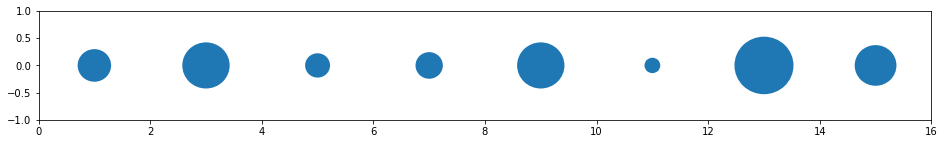

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set(xlim=(0,2**(N+1)), ylim=(-1,1))
fig.set_size_inches(2**(N+1), 2)
for x in range(2**N):
    c = plt.Circle((2*x+1, 0), np.sqrt(histogram_list[x]))
    ax.add_artist(c)
